---
title: Seurat Analysis using E135 data from GSE107122. 
authors:
- shashank.jatav@elucidata.io
tags:
- Seurat
- Single_Cell_RNA
created_at: 2018-03-08
updated_at: 2018-03-08
tldr: This notebook analyses single cell RNA sequencing data from the study
**Developmental emergence of adult neural stem cells as revealed by single cell transcriptional profiling** - [GSE107122](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE107122)
---

We analyse single cell gene expression data from the murine embryonic cortex at embryonic age E13.5, when there are three distinct cell types: 
- radial glial precursors (RPs)
- a transit-amplifying intermediate progenitor cell called an intermediate progenitor (IP)
- their newborn neuronal progeny (Neuron)

## Seurat Analysis using E135 data from GSE107122 <a name="seurat"></a>

### Load the required packages  <a name="p1.1"></a>

In [1]:
library(Seurat)
library(dplyr)
library(Matrix)
packageVersion("Seurat")
# set plot widths for the notebook
library(repr)
options(repr.plot.width=13, repr.plot.height=9)

Loading required package: ggplot2

Loading required package: cowplot


********************************************************

Note: As of version 1.0.0, cowplot does not change the

  default ggplot2 theme anymore. To recover the previous

  behavior, execute:
  theme_set(theme_cowplot())

********************************************************


Loading required package: Matrix


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




[1] ‘2.3.0’

### Download the data from GEO <a name="p1.2"></a>

In [6]:
system("wget https://ftp.ncbi.nlm.nih.gov/geo/series/GSE107nnn/GSE107122/suppl/GSE107122_RAW.tar", intern = TRUE)
system("tar -xvf GSE107122_RAW.tar", intern = TRUE)
system("gunzip GSM2861511_E135_Only_Cortical_Cells_DGE.txt.gz")

character(0)

[1] "GSM2861510_E115_All_Cells_DGE.txt.gz"          
[2] "GSM2861510_E115_Only_Cortical_Cells_DGE.txt.gz"
[3] "GSM2861511_E135_All_Cells_DGE.txt.gz"          
[4] "GSM2861511_E135_Only_Cortical_Cells_DGE.txt.gz"
[5] "GSM2861514_E175_All_Cells_DGE.txt.gz"          
[6] "GSM2861514_E175_Only_Cortical_Cells_DGE.txt.gz"

### Read the data into a Seurat object <a name="p1.3"></a>
We read the data into a dataframe and then create a Seurat object. The Seurat object is a data structure provided by the Seurat package which allows us to do different operations on the dataset.

In [7]:
E135_Cortical_data <- read.table("GSM2861511_E135_Only_Cortical_Cells_DGE.txt",sep="\t",header=TRUE,row.names=1)

In [8]:
dim(E135_Cortical_data)
head(E135_Cortical_data)

[1] 17082  1137

GTAGCAATTTCT TACTAGATGCTA TATCAGCAGATT TACAGGCCCGTC TGATATACACTT
0610005C13Rik 0            0            0            0            0           
0610007N19Rik 0            0            2            0            0           
0610007P14Rik 0            0            1            1            0           
0610009B22Rik 0            1            0            0            1           
0610009D07Rik 0            2            1            0            2           
0610009E02Rik 0            0            0            0            0           
              ATTTCGCGTGAA GGTTTGTCCTTT AACGTCACATCC CCTATCCTTTGC AAATTCGTCGGT
0610005C13Rik 0            0            0            0            0           
0610007N19Rik 0            0            0            0            0           
0610007P14Rik 1            0            1            0            0           
0610009B22Rik 0            0            0            0            0           
0610009D07Rik 0            4            2            0            2           
0610009E02Rik 0            0            0            0            0           
              ⋯ GCCGATAGAGCN TCAATCCGCGGG AGTGTGATAGTG TCATTGCGGCTG
0610005C13Rik ⋯ 0            0            0            0           
0610007N19Rik ⋯ 0            2            0            0           
0610007P14Rik ⋯ 0            0            0            1           
0610009B22Rik ⋯ 0            0            0            0           
0610009D07Rik ⋯ 1            0            0            1           
0610009E02Rik ⋯ 0            0            0            0           
              CTCTAGCTTCCG CTAACGCAAGAC GTGTTTGCGGTA ATGTTGCATGAC ATACCAGCTAAG
0610005C13Rik 0            0            0            0            0           
0610007N19Rik 0            0            0            0            0           
0610007P14Rik 1            0            0            0            0           
0610009B22Rik 0            0            0            0            0           
0610009D07Rik 1            0            0            0            0           
0610009E02Rik 0            0            0            0            0           
              ATGTTGCATGAN
0610005C13Rik 0           
0610007N19Rik 0           
0610007P14Rik 0           
0610009B22Rik 0           
0610009D07Rik 0           
0610009E02Rik 0

In [9]:
E135_Cortical <- CreateSeuratObject(raw.data = E135_Cortical_data, min.cells = 3, min.genes = 200, project = "E135_Cortical")

**nGene** and **nUMI** are automatically calculated for each cell by Seurat
- nGene is the number of genes detected in each cell. 
- nUMI is the total number of molecules detected within a cell. 

Low *nGene* for a cell indicates that it may be dead or an empty droplet.
High *nUMI* and/or *nGene* indicates that the "cell" may in fact be a doublet.

We also check the percentage of counts originating from a mitochondrial genes.

Warning message in SingleVlnPlot(feature = x, data = data.use[, x, drop = FALSE], :
“All cells have the same value of feature.”
Warning message in cor(x = data.plot$x, y = data.plot$y):
“the standard deviation is zero”


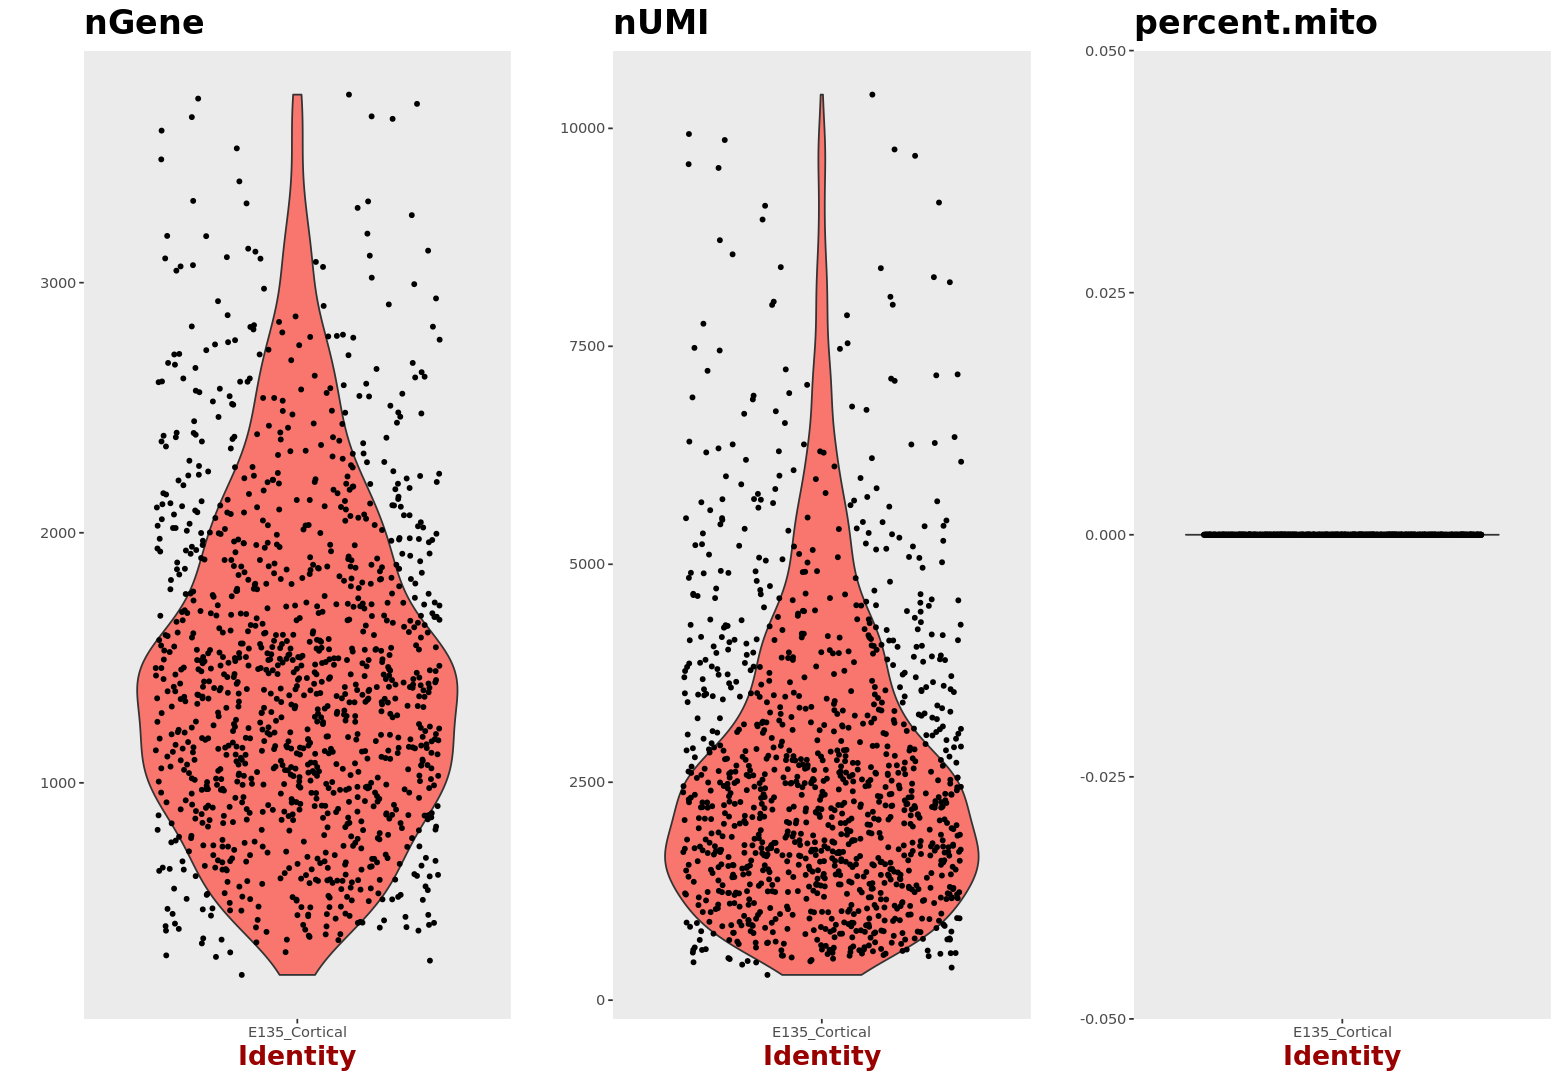

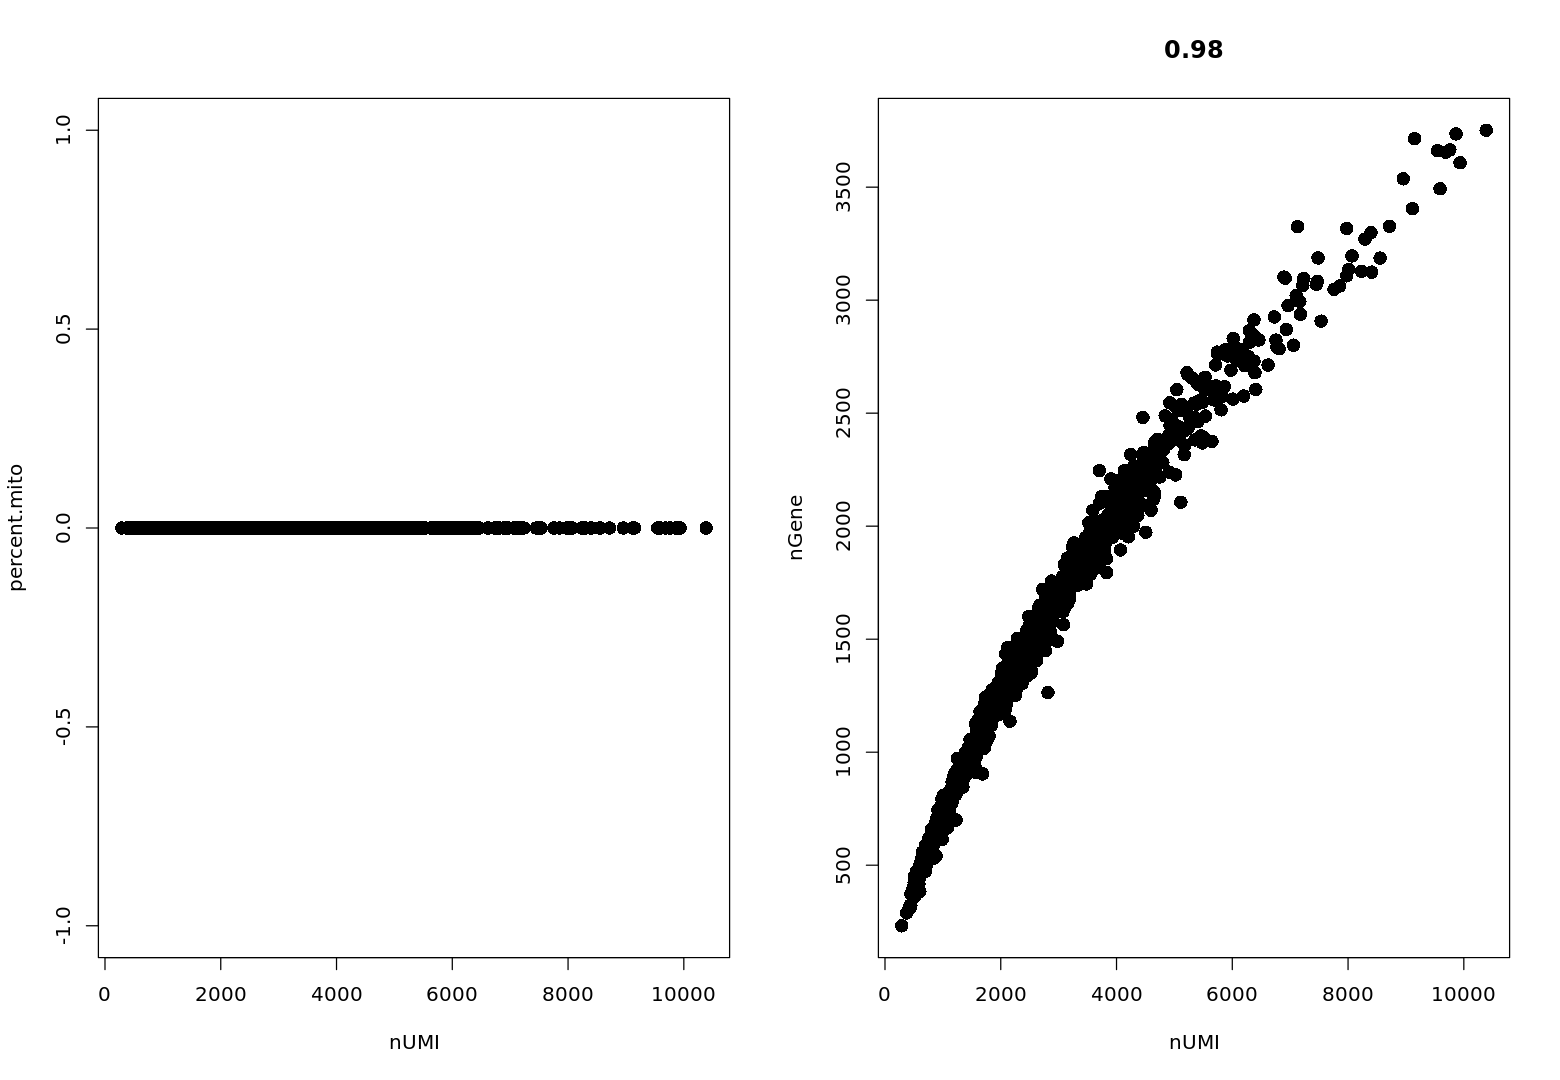

In [11]:
mito.genes <- grep(pattern = "^MT-", x = rownames(x = E135_Cortical@data), value = TRUE)
percent.mito <- Matrix::colSums(E135_Cortical@raw.data[mito.genes, ]) / Matrix::colSums(E135_Cortical@raw.data)

E135_Cortical <- AddMetaData(object = E135_Cortical, metadata = percent.mito, col.name = "percent.mito")
VlnPlot(object = E135_Cortical, features.plot = c("nGene", "nUMI", "percent.mito"), nCol = 3)

par(mfrow = c(1, 2))
GenePlot(object = E135_Cortical, gene1 = "nUMI", gene2 = "percent.mito")
GenePlot(object = E135_Cortical, gene1 = "nUMI", gene2 = "nGene")

### Filter unwanted cells <a name="p1.4"></a>

Based on the plots above we filter cells which have less than 200 and more than 2500 genes detected. We also filter cells with more than 8 percent mitochondrial gene content

In [13]:
E135_Cortical <- FilterCells(object = E135_Cortical, subset.names = c("nGene", "percent.mito"), low.thresholds = c(200, -Inf), high.thresholds = c(2500, 0.05))

In [14]:
dim(E135_Cortical@data)

[1] 13295  1040

### Normalize the data <a name="p1.5"></a>

In [15]:
E135_Cortical <- NormalizeData(object = E135_Cortical, normalization.method = "LogNormalize", scale.factor = 1e4)

### Scale the data <a name="p1.7"></a>

The ScaleData function:
- Shifts the expression of each gene, so that the mean expression across cells is 0
- Scales the expression of each gene, so that the variance across cells is 1.

This step is done to give equal weights to genes, so that highly-expressed genes do not dominate.

In [16]:
E135_Cortical <- ScaleData(object = E135_Cortical, vars.to.regress = c("nUMI", "percent.mito"))

[1] "Regressing out nUMI"         "Regressing out percent.mito"
  |======================================================================| 100%
Time Elapsed:  26.0819544792175 secs
[1] "Scaling data matrix"
  |======================================================================| 100%


### Find highly variable genes <a name="p1.6"></a>
Next, we find a subset of genes that exhibit high cell-to-cell variation in the dataset. Working on this subset of genes gives better biological signals.

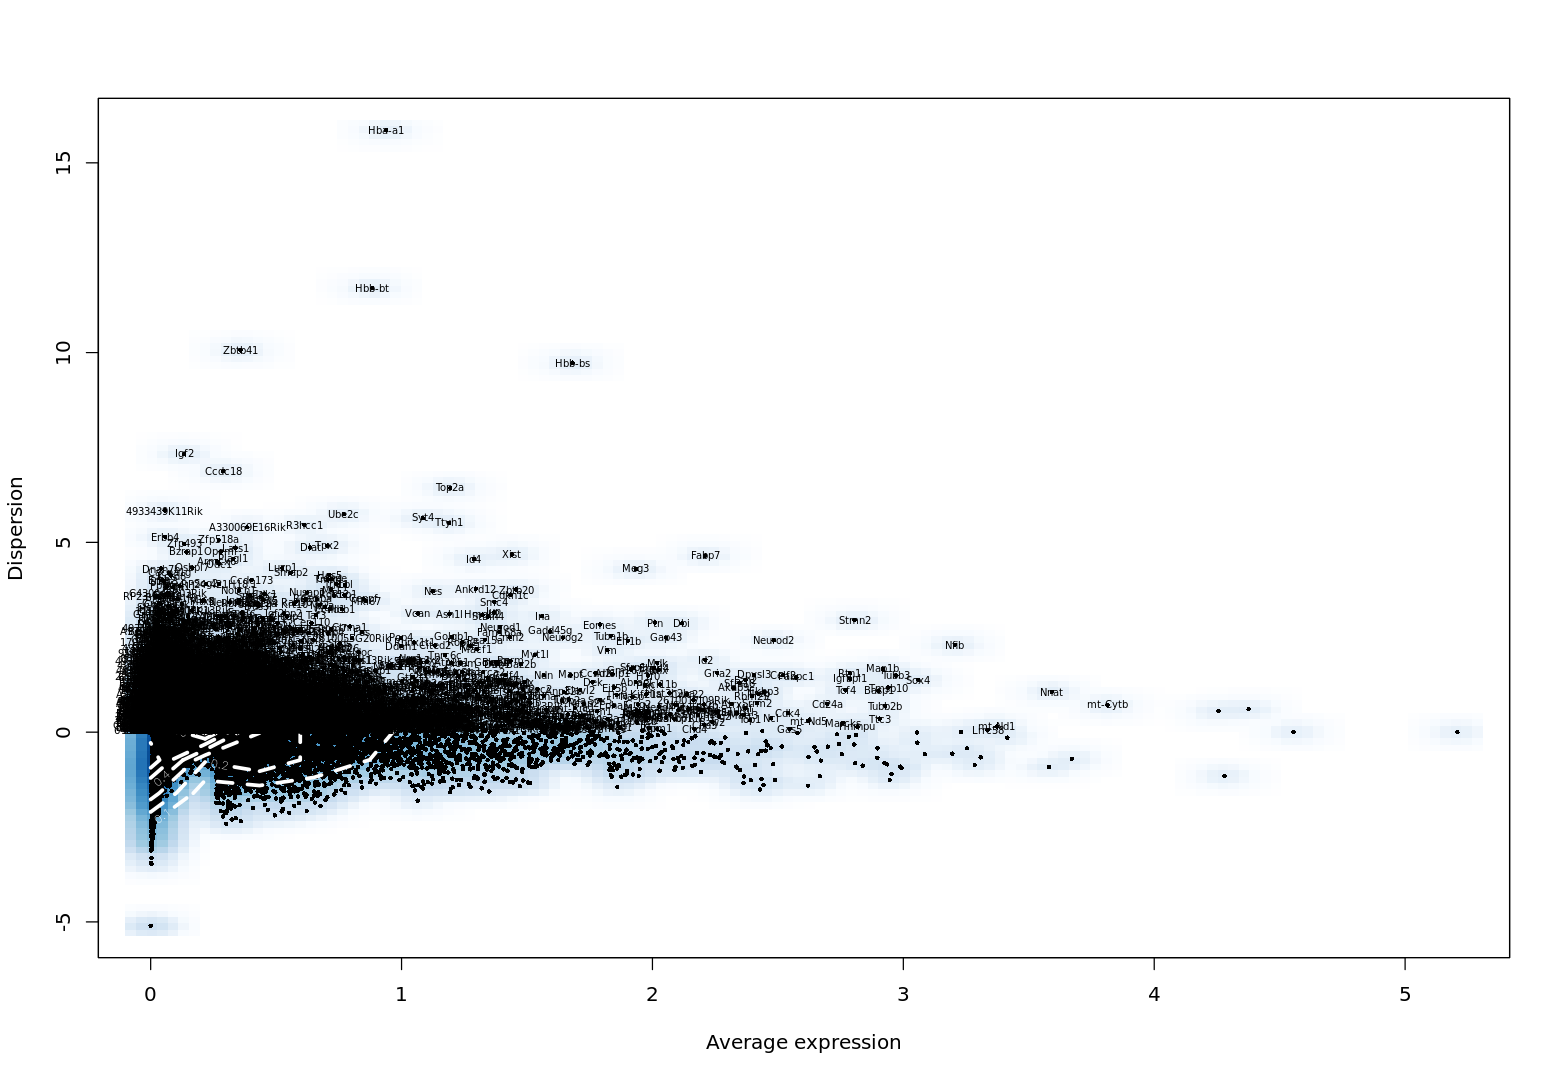

In [19]:
E135_Cortical <- FindVariableGenes(object = E135_Cortical, mean.function = ExpMean, dispersion.function = LogVMR, x.low.cutoff = 0.001, x.high.cutoff = 4.0, y.cutoff = 0.05)

In [20]:
length(x = E135_Cortical@var.genes)

[1] 5888

### Get the principal components  <a name="p1.8"></a>
We run PCA and choose the top *n* principal components for doing further computation

In [22]:
E135_Cortical <- RunPCA(object = E135_Cortical, pc.genes = E135_Cortical@var.genes, do.print = TRUE, pcs.print = 1:5, genes.print = 5)

[1] "PC1"
[1] "Tubb3" "Stmn2" "Rtn1"  "Crmp1" "Cd24a"
[1] ""
[1] "Dbi"   "Hmgb2" "Sox2"  "Fabp7" "Nr2e1"
[1] ""
[1] ""
[1] "PC2"
[1] "Tubb2a" "Ina"    "Mapt"   "Dab1"   "Gap43" 
[1] ""
[1] "Igfbpl1" "Eomes"   "Elavl4"  "Sstr2"   "Neurod1"
[1] ""
[1] ""
[1] "PC3"
[1] "Nusap1" "Ckap2l" "Top2a"  "Spc25"  "Ube2c" 
[1] ""
[1] "Ldha"  "Mfge8" "Ckb"   "Vim"   "Dbi"  
[1] ""
[1] ""
[1] "PC4"
[1] "Cntn2" "Mif"   "Gria2" "Satb2" "Bzw2" 
[1] ""
[1] "Eomes"   "Camk2b"  "Meg3"    "Rprm"    "Dync1i1"
[1] ""
[1] ""
[1] "PC5"
[1] "Nfix"    "Fezf2"   "Ier5"    "Ppp2r2b" "Rprm"   
[1] ""
[1] "Zbtb20" "Ptn"    "Cbln2"  "Nr2f1"  "Dner"  
[1] ""
[1] ""


### Find clusters <a name="p1.9"></a>
The resolution determines the number of clusters that will be returned.

In [23]:
E135_Cortical <- FindClusters(object = E135_Cortical, reduction.type = "pca", dims.use = 1:20, resolution = 2.5, print.output = 0, save.SNN = TRUE, force.recalc = T)

### Run t-SNE (non-linear dimensionality reducion) <a name="p1.10"></a>

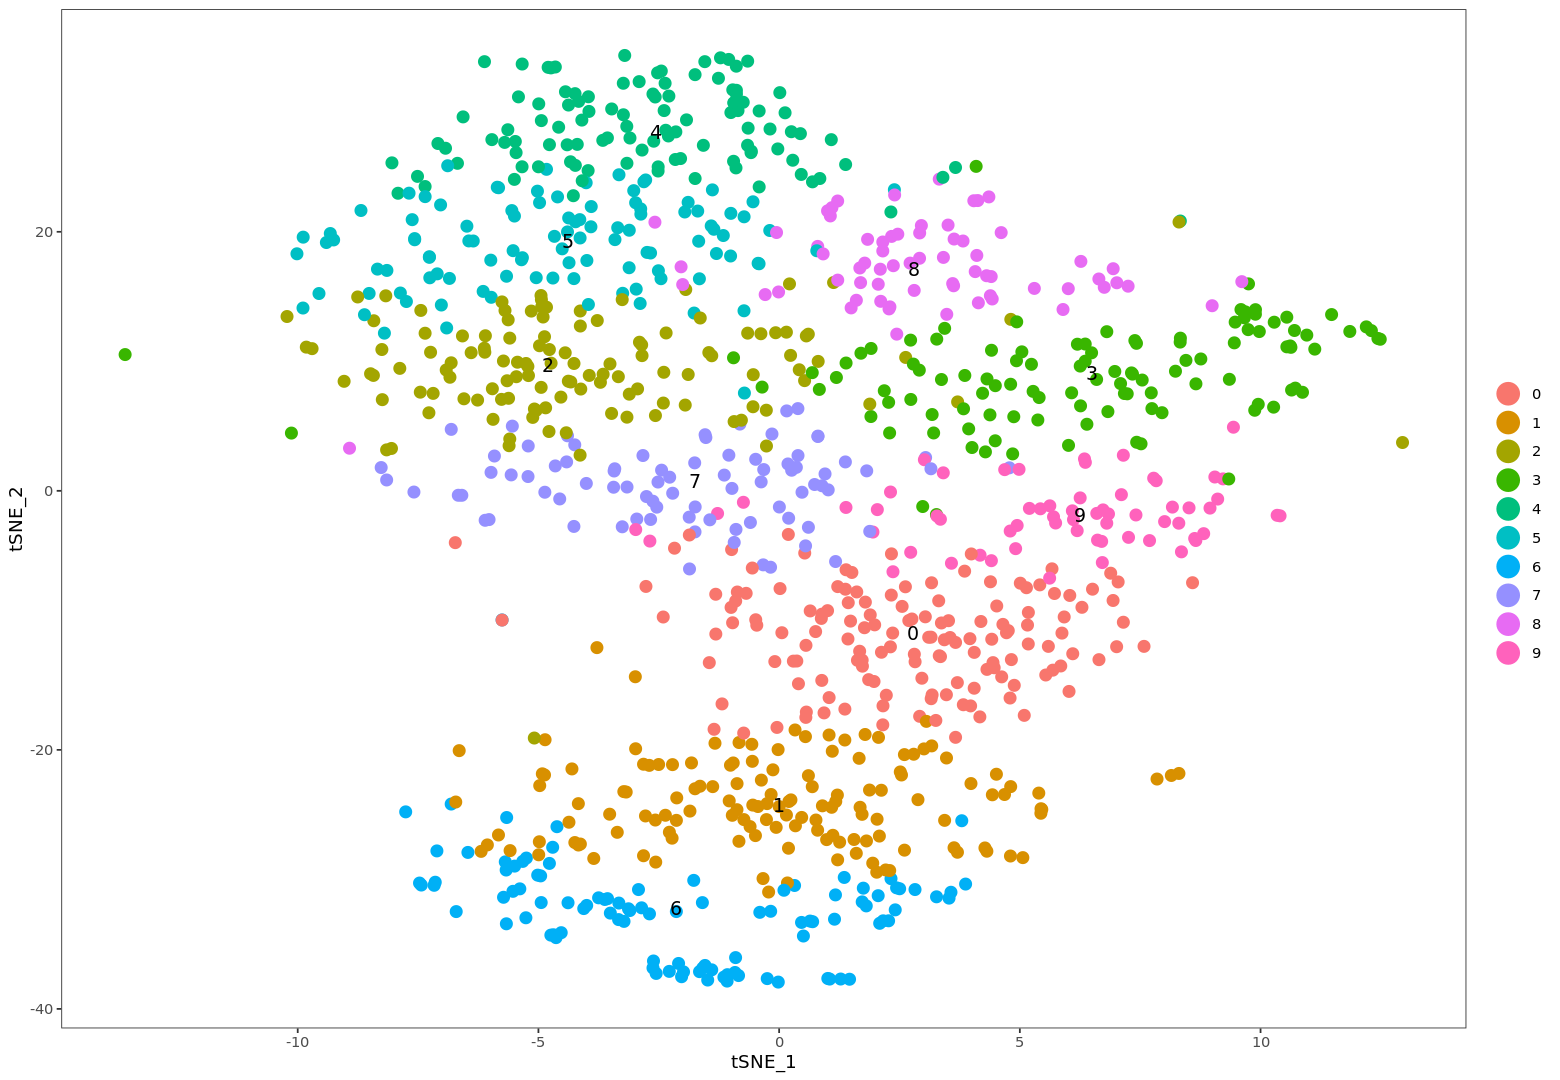

In [26]:
E135_Cortical <- RunTSNE(object = E135_Cortical, dims.use = 1:20, do.fast = TRUE)
TSNEPlot(object = E135_Cortical, pt.size = 3, do.label = T)

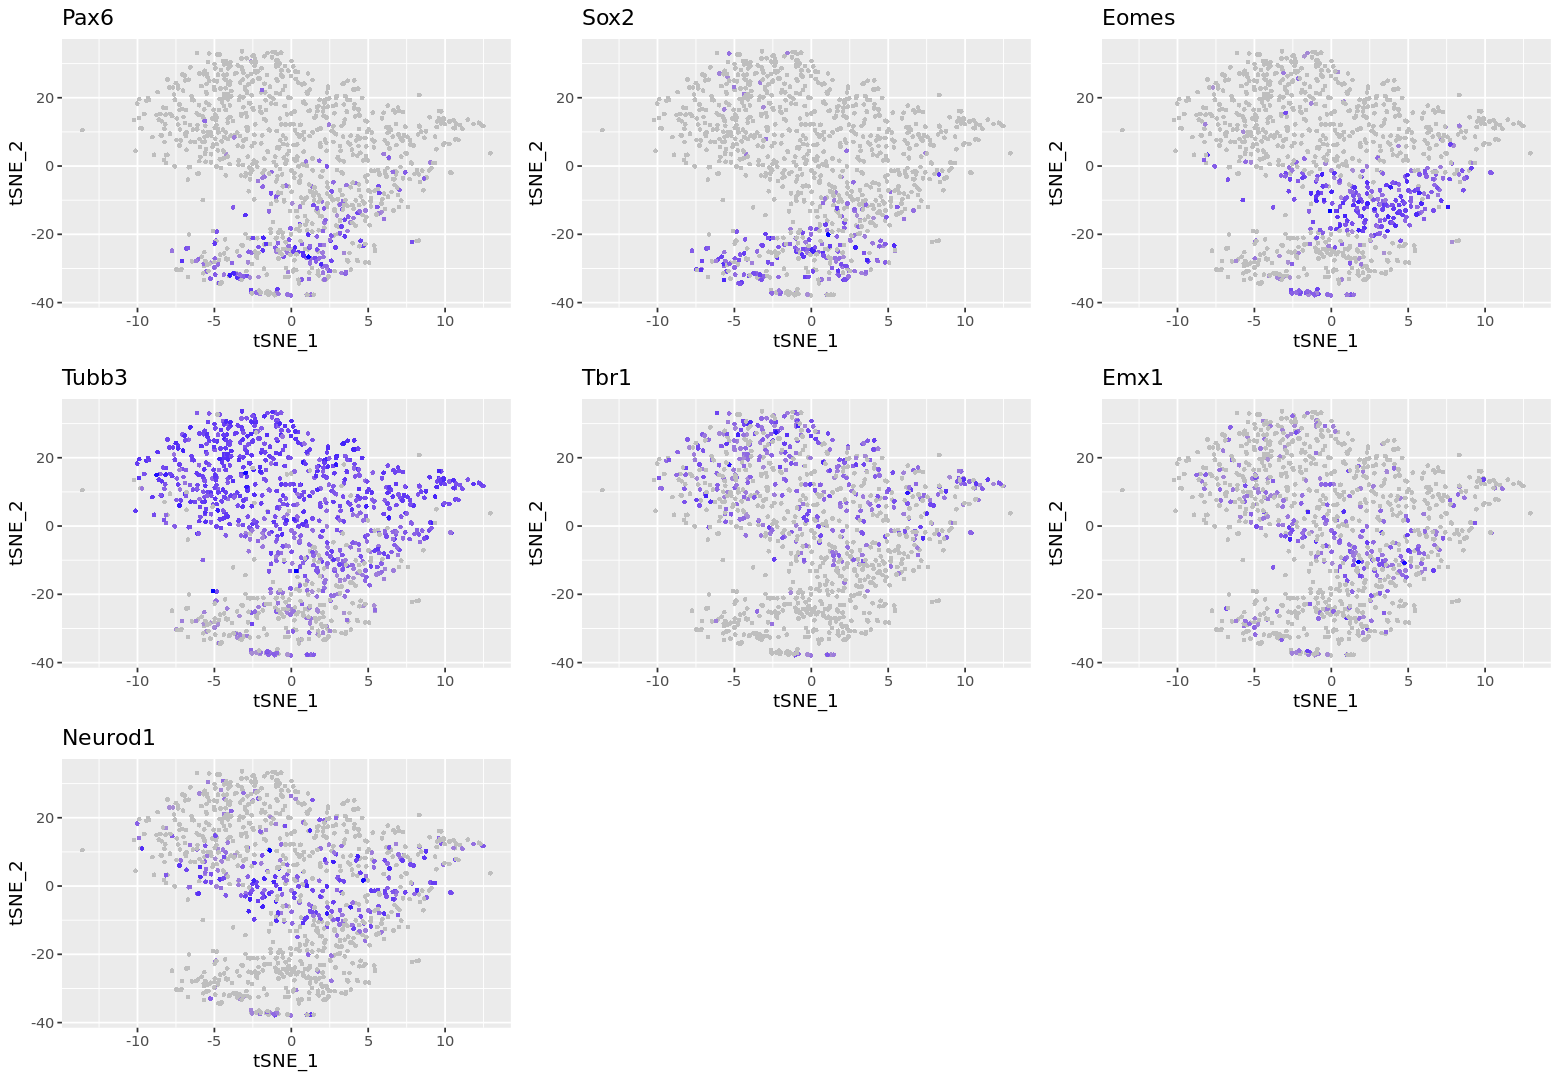

In [27]:
FeaturePlot(object = E135_Cortical, features.plot = c("Pax6", "Sox2", "Eomes", "Tubb3", "Tbr1", "Emx1", "Neurod1"), cols.use = c("grey", "blue"), reduction.use = "tsne")

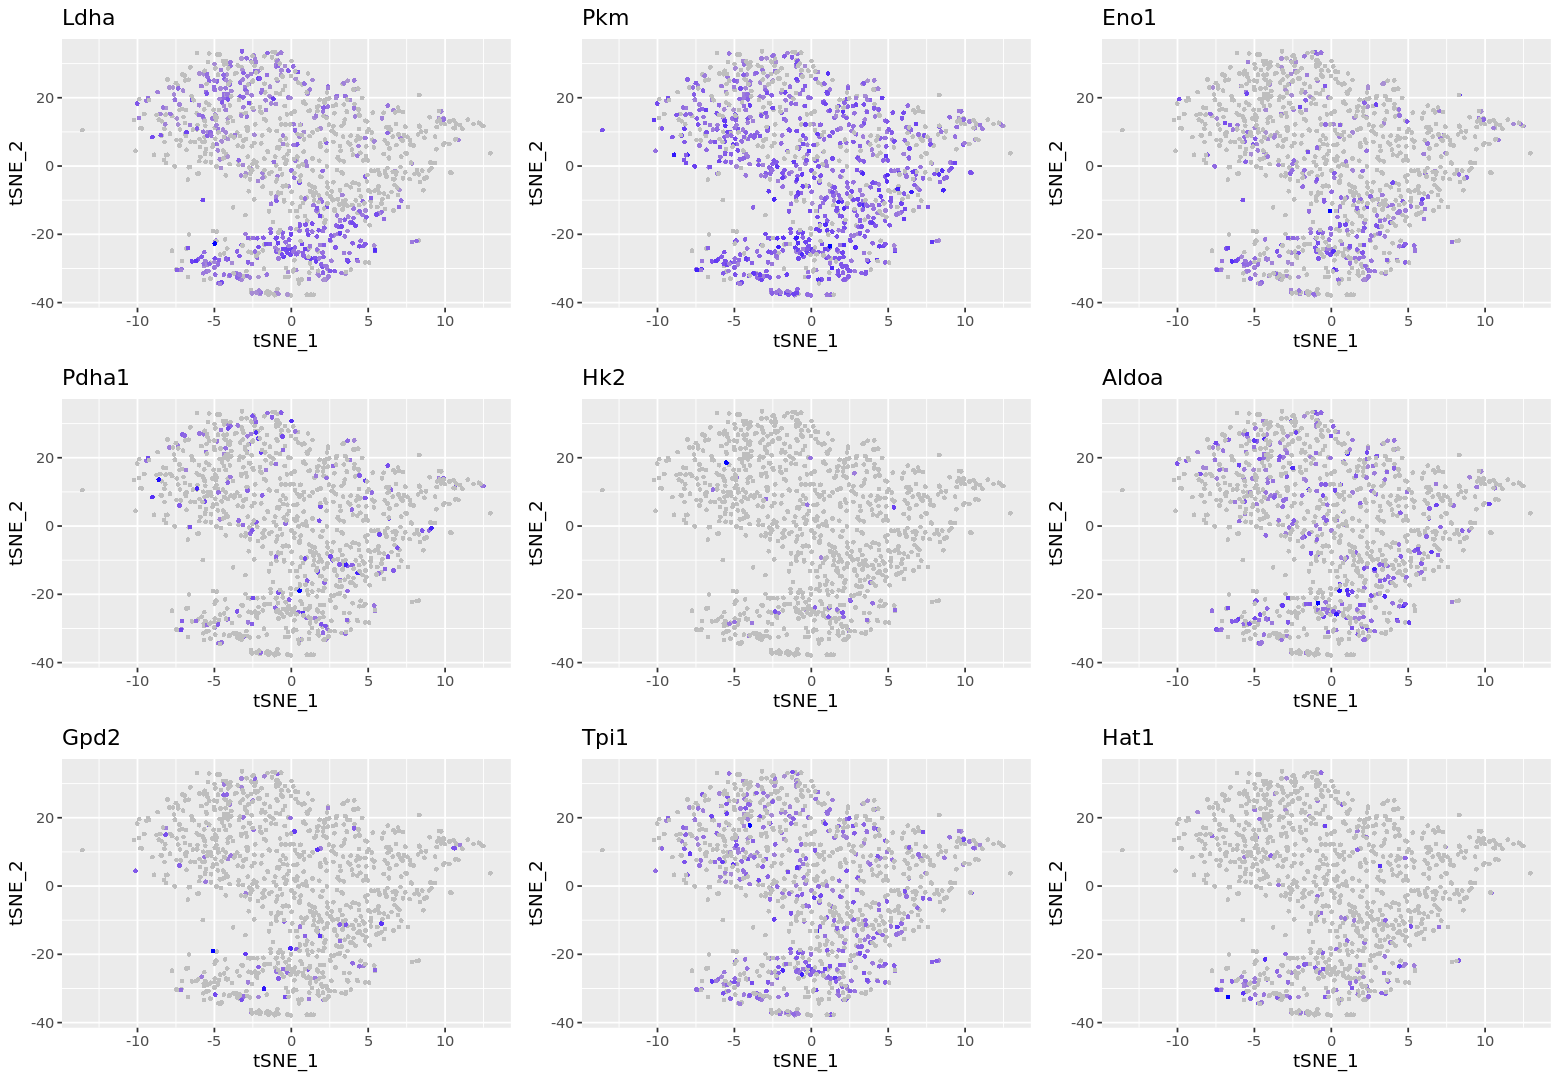

In [28]:
FeaturePlot(object = E135_Cortical, features.plot = c("Ldha", "Pkm", "Eno1", "Pdha1", "Hk2", "Aldoa", "Gpd2", "Tpi1", "Hat1"), cols.use = c("grey", "blue"), reduction.use = "tsne")

### Annotate the clusters <a name="p1.11"></a>

We decide the identity of each cluster by using cell type markers given in this [publication](https://www.sciencedirect.com/science/article/pii/S2211124717318132)

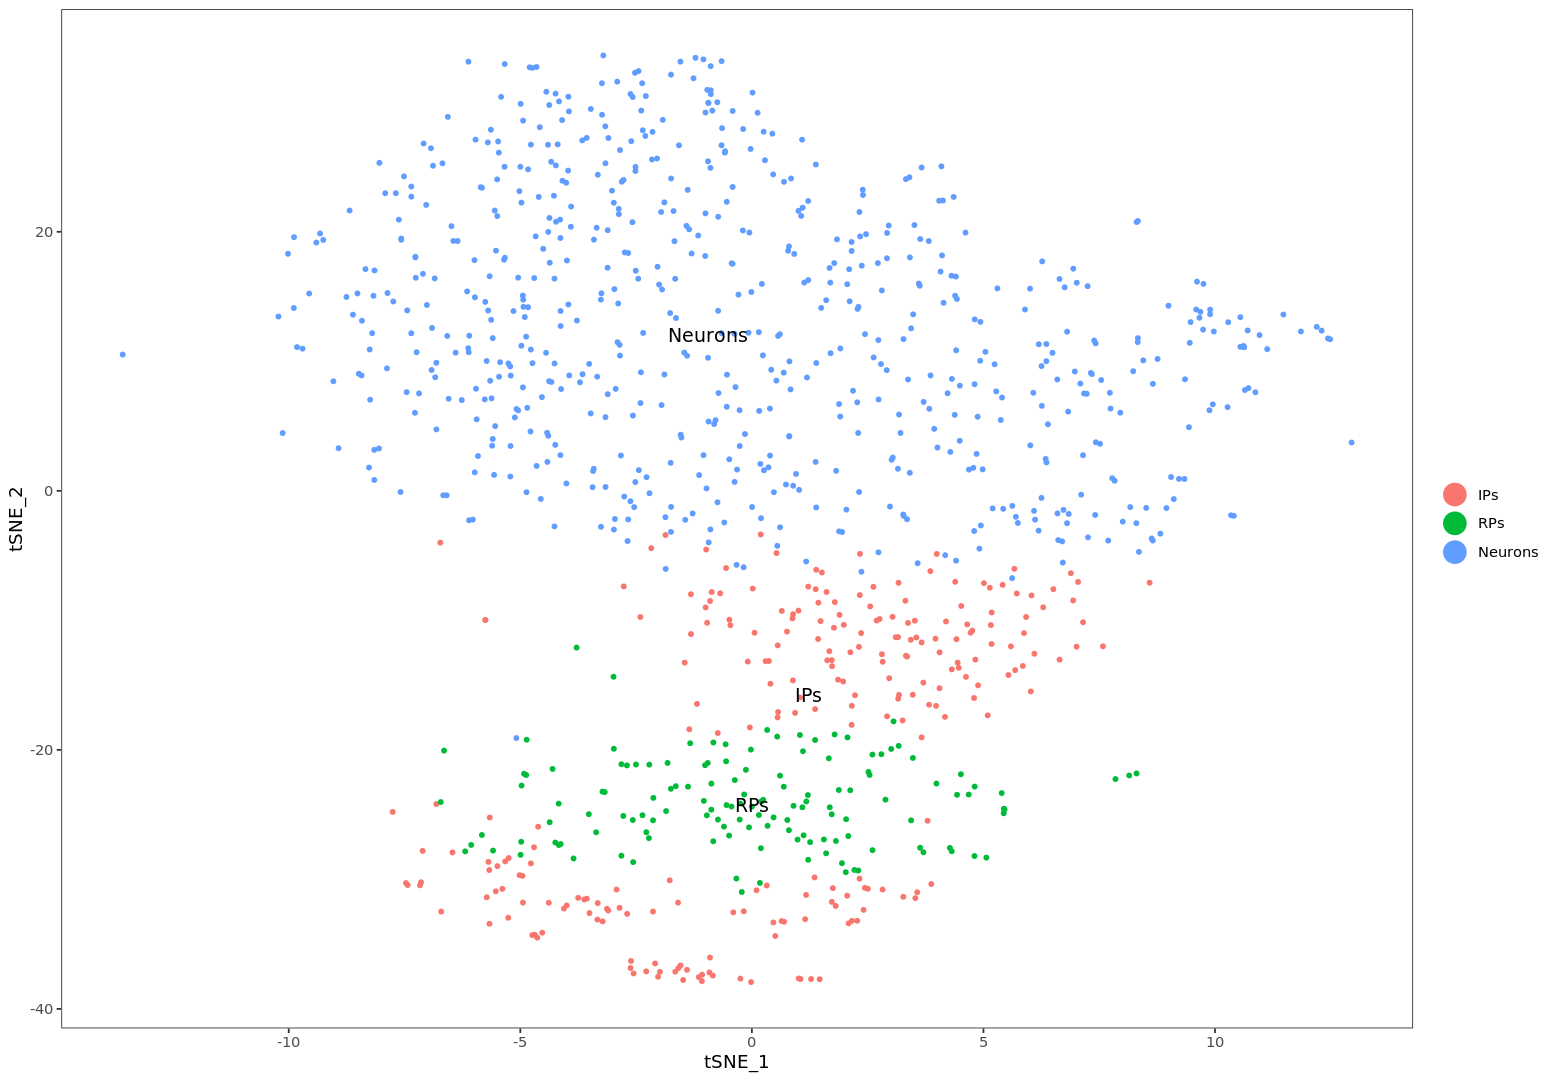

In [29]:
current.cluster.ids <- c(0, 1, 2, 3, 4, 5, 6, 7 ,8, 9)
new.cluster.ids <- c("IPs", "RPs", "Neurons", "Neurons", "Neurons", "Neurons", "IPs", "Neurons", "Neurons", "Neurons")
E135_Cortical@ident <- plyr::mapvalues(x = E135_Cortical@ident, from = current.cluster.ids, to = new.cluster.ids)
TSNEPlot(object = E135_Cortical, do.label = TRUE, pt.size = 1)

In [30]:
make_tsne_plot_celltype <- function(Seurat_object, name = "metabolic state",
                                    fill_list =  c("S0" = "#84BD00FF" , "S1" = "#5C88DAFF", "S2" = "#CC0C00FF")){
    require(ggplot2)

    tsne_df <- as.data.frame(Seurat_object@dr$tsne@cell.embeddings)
    tsne_df$ident <- Seurat_object@ident

    p <- ggplot(tsne_df, aes(x = tSNE_1, y = tSNE_2, fill = ident)) + 
    geom_point(shape = 21, size = 5, alpha = 0.9) + # scatter plot function with shape of points defined as 21 scale.
    labs(x = "", y = "", fill = "ident") + # x and y axis labels
    scale_x_continuous(breaks = seq(1, 31, 5)) + # breaks for x-axis
    scale_size(range = c(1, 10)) + # scales area of the plot
    scale_fill_manual(name = name, values = fill_list) +  # filling the point colors
    theme(legend.position = "right", legend.direction = "vertical",
          legend.justification = "top",# legend positioned at the bottom, horizantal direction,
    axis.line = element_blank(),
    axis.text.x = element_blank(),
    axis.text.y = element_blank(),
    panel.grid.major = element_blank(), # major grids included
    panel.grid.minor = element_blank(), # no minor grids
    panel.border = element_blank(), panel.background = element_blank(), # no borders and background color
    axis.title = element_text(colour="black", size = 15, face = "bold"), # axis title
    legend.text = element_text(size = 25, face = "bold"),
    legend.title = element_text(colour="black", size=25, face="bold"),
    axis.ticks.length = unit(0.25, "cm"),
    axis.ticks = element_blank(),
    legend.key.size = unit(4, "point"))
    return(p)
}

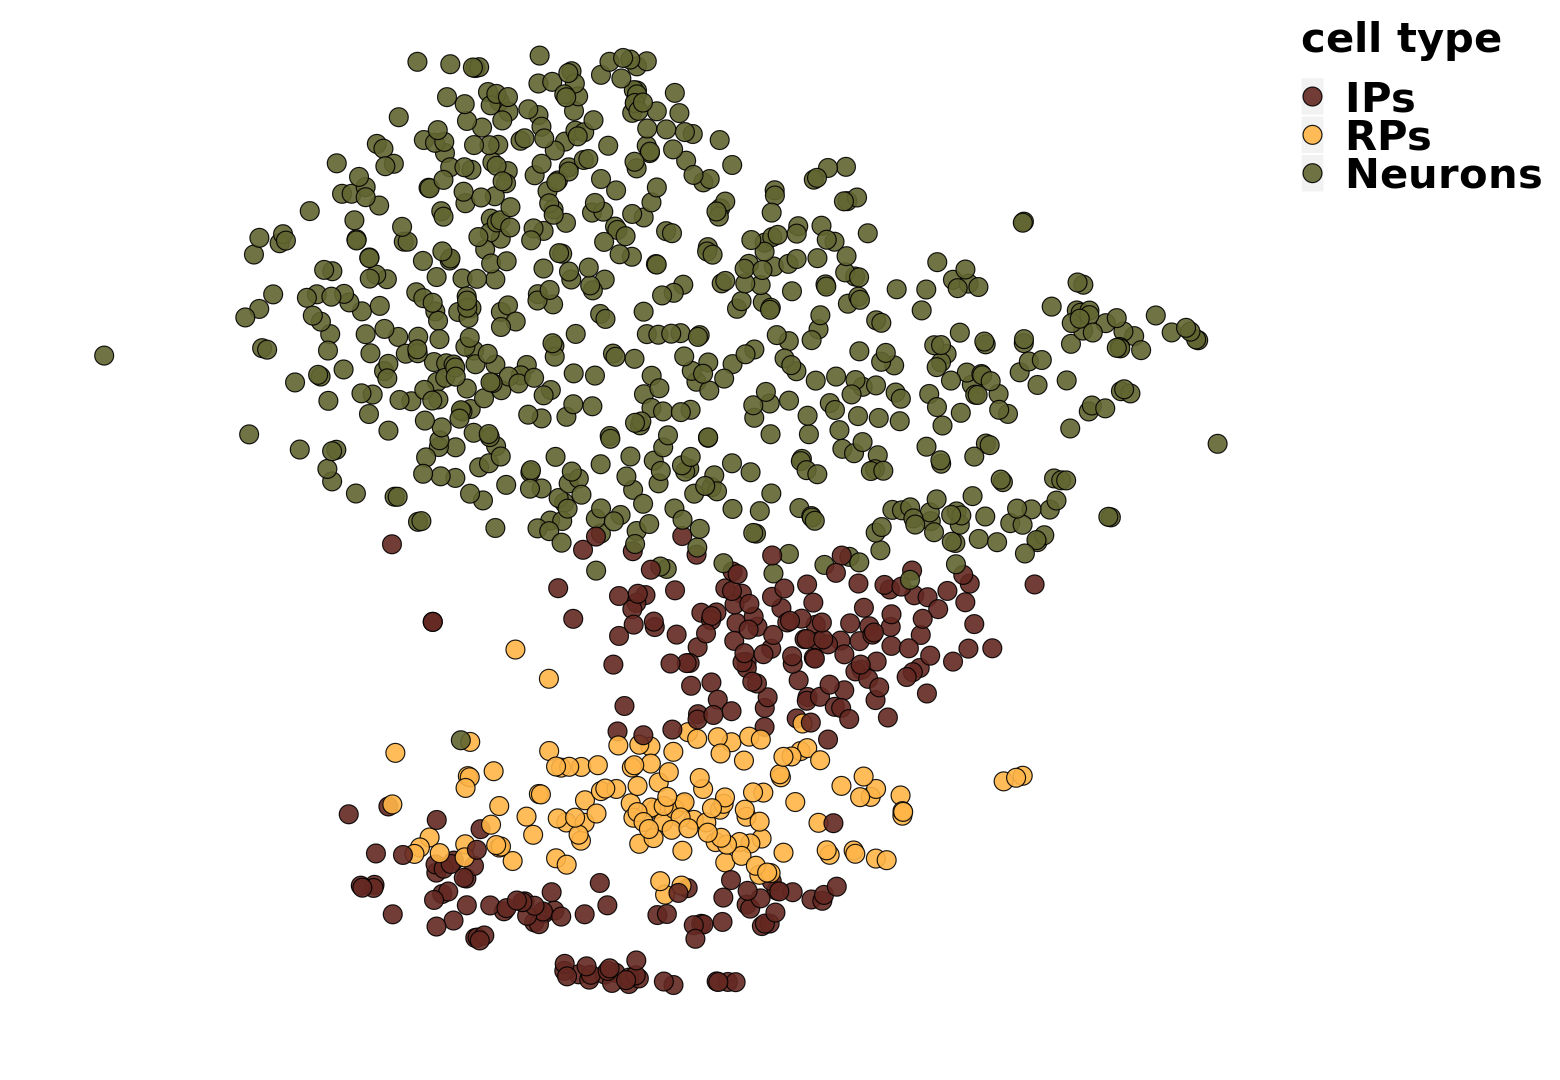

In [32]:
make_tsne_plot_celltype(E135_Cortical, name = "cell type", 
                        fill_list =  c("Neurons" = "#616530FF", "IPs" = "#642822FF", "RPs" = "#FFB547FF"))

## IntOmix Analysis<a name="intomix"></a>

### Finding differentially expressed genes for CombiT
Now we will find the differentially expressed genes between Rps and Neurons. These will be used as input to IntOmix.

In [33]:
clusterRPsvsNeurons.markers <- FindMarkers(object = E135_Cortical, ident.1 = "RPs", ident.2 = "Neurons", logfc.threshold = 0.005, min.pct = 0.05)
dim(clusterRPsvsNeurons.markers)

[1] 7248    5

In [34]:
head(clusterRPsvsNeurons.markers)

p_val        avg_logFC pct.1 pct.2 p_val_adj   
Dbi   2.569346e-87 2.460031  0.935 0.201 3.415945e-83
Ddah1 1.223897e-80 1.932455  0.676 0.047 1.627172e-76
Sox2  7.221524e-78 1.898914  0.590 0.024 9.601017e-74
Gas1  1.972155e-77 1.838423  0.547 0.014 2.621980e-73
Nr2e1 2.128761e-77 1.727004  0.583 0.021 2.830187e-73
Ttyh1 1.273460e-75 1.834276  0.727 0.082 1.693066e-71

In [35]:
clusterRPsvsNeurons.markers_intomix <- data.frame(ID = row.names(clusterRPsvsNeurons.markers), pval = clusterRPsvsNeurons.markers$p_val, log2FC = clusterRPsvsNeurons.markers$avg_logFC)
head(clusterRPsvsNeurons.markers_intomix)

ID    pval         log2FC  
1 Dbi   2.569346e-87 2.460031
2 Ddah1 1.223897e-80 1.932455
3 Sox2  7.221524e-78 1.898914
4 Gas1  1.972155e-77 1.838423
5 Nr2e1 2.128761e-77 1.727004
6 Ttyh1 1.273460e-75 1.834276

In [36]:
write.csv(clusterRPsvsNeurons.markers_intomix, "clusterRPsvsNeurons.markers_E135.csv", row.names = F)

### Running IntOmix <a name="p2.2"></a>
We developed a technique that leverages single-cell RNA sequencing data to infer global metabolic rewiring across different cellular phenotypes at the level of individual genes and metabolites
It uses KEGG’s map of enzymes, metabolites and the reactions between them. It uses an algorithm called **IntOmix** which maps the differential enzymes between two phenotypes in the data on the map and finds a significant subnetwork. This is done by optimising the network to find the maximum weighted subgraph from the entire network.

#### To try intoOmix go to [Polly Intomix](https://resources.elucidata.io/intomix)
Here we show the metabolic subnetwork generated by Intomix for for RPs and Neurons.

### Intomix resuls for 13th day RPs vs Neurons <a name="p2.3"></a>

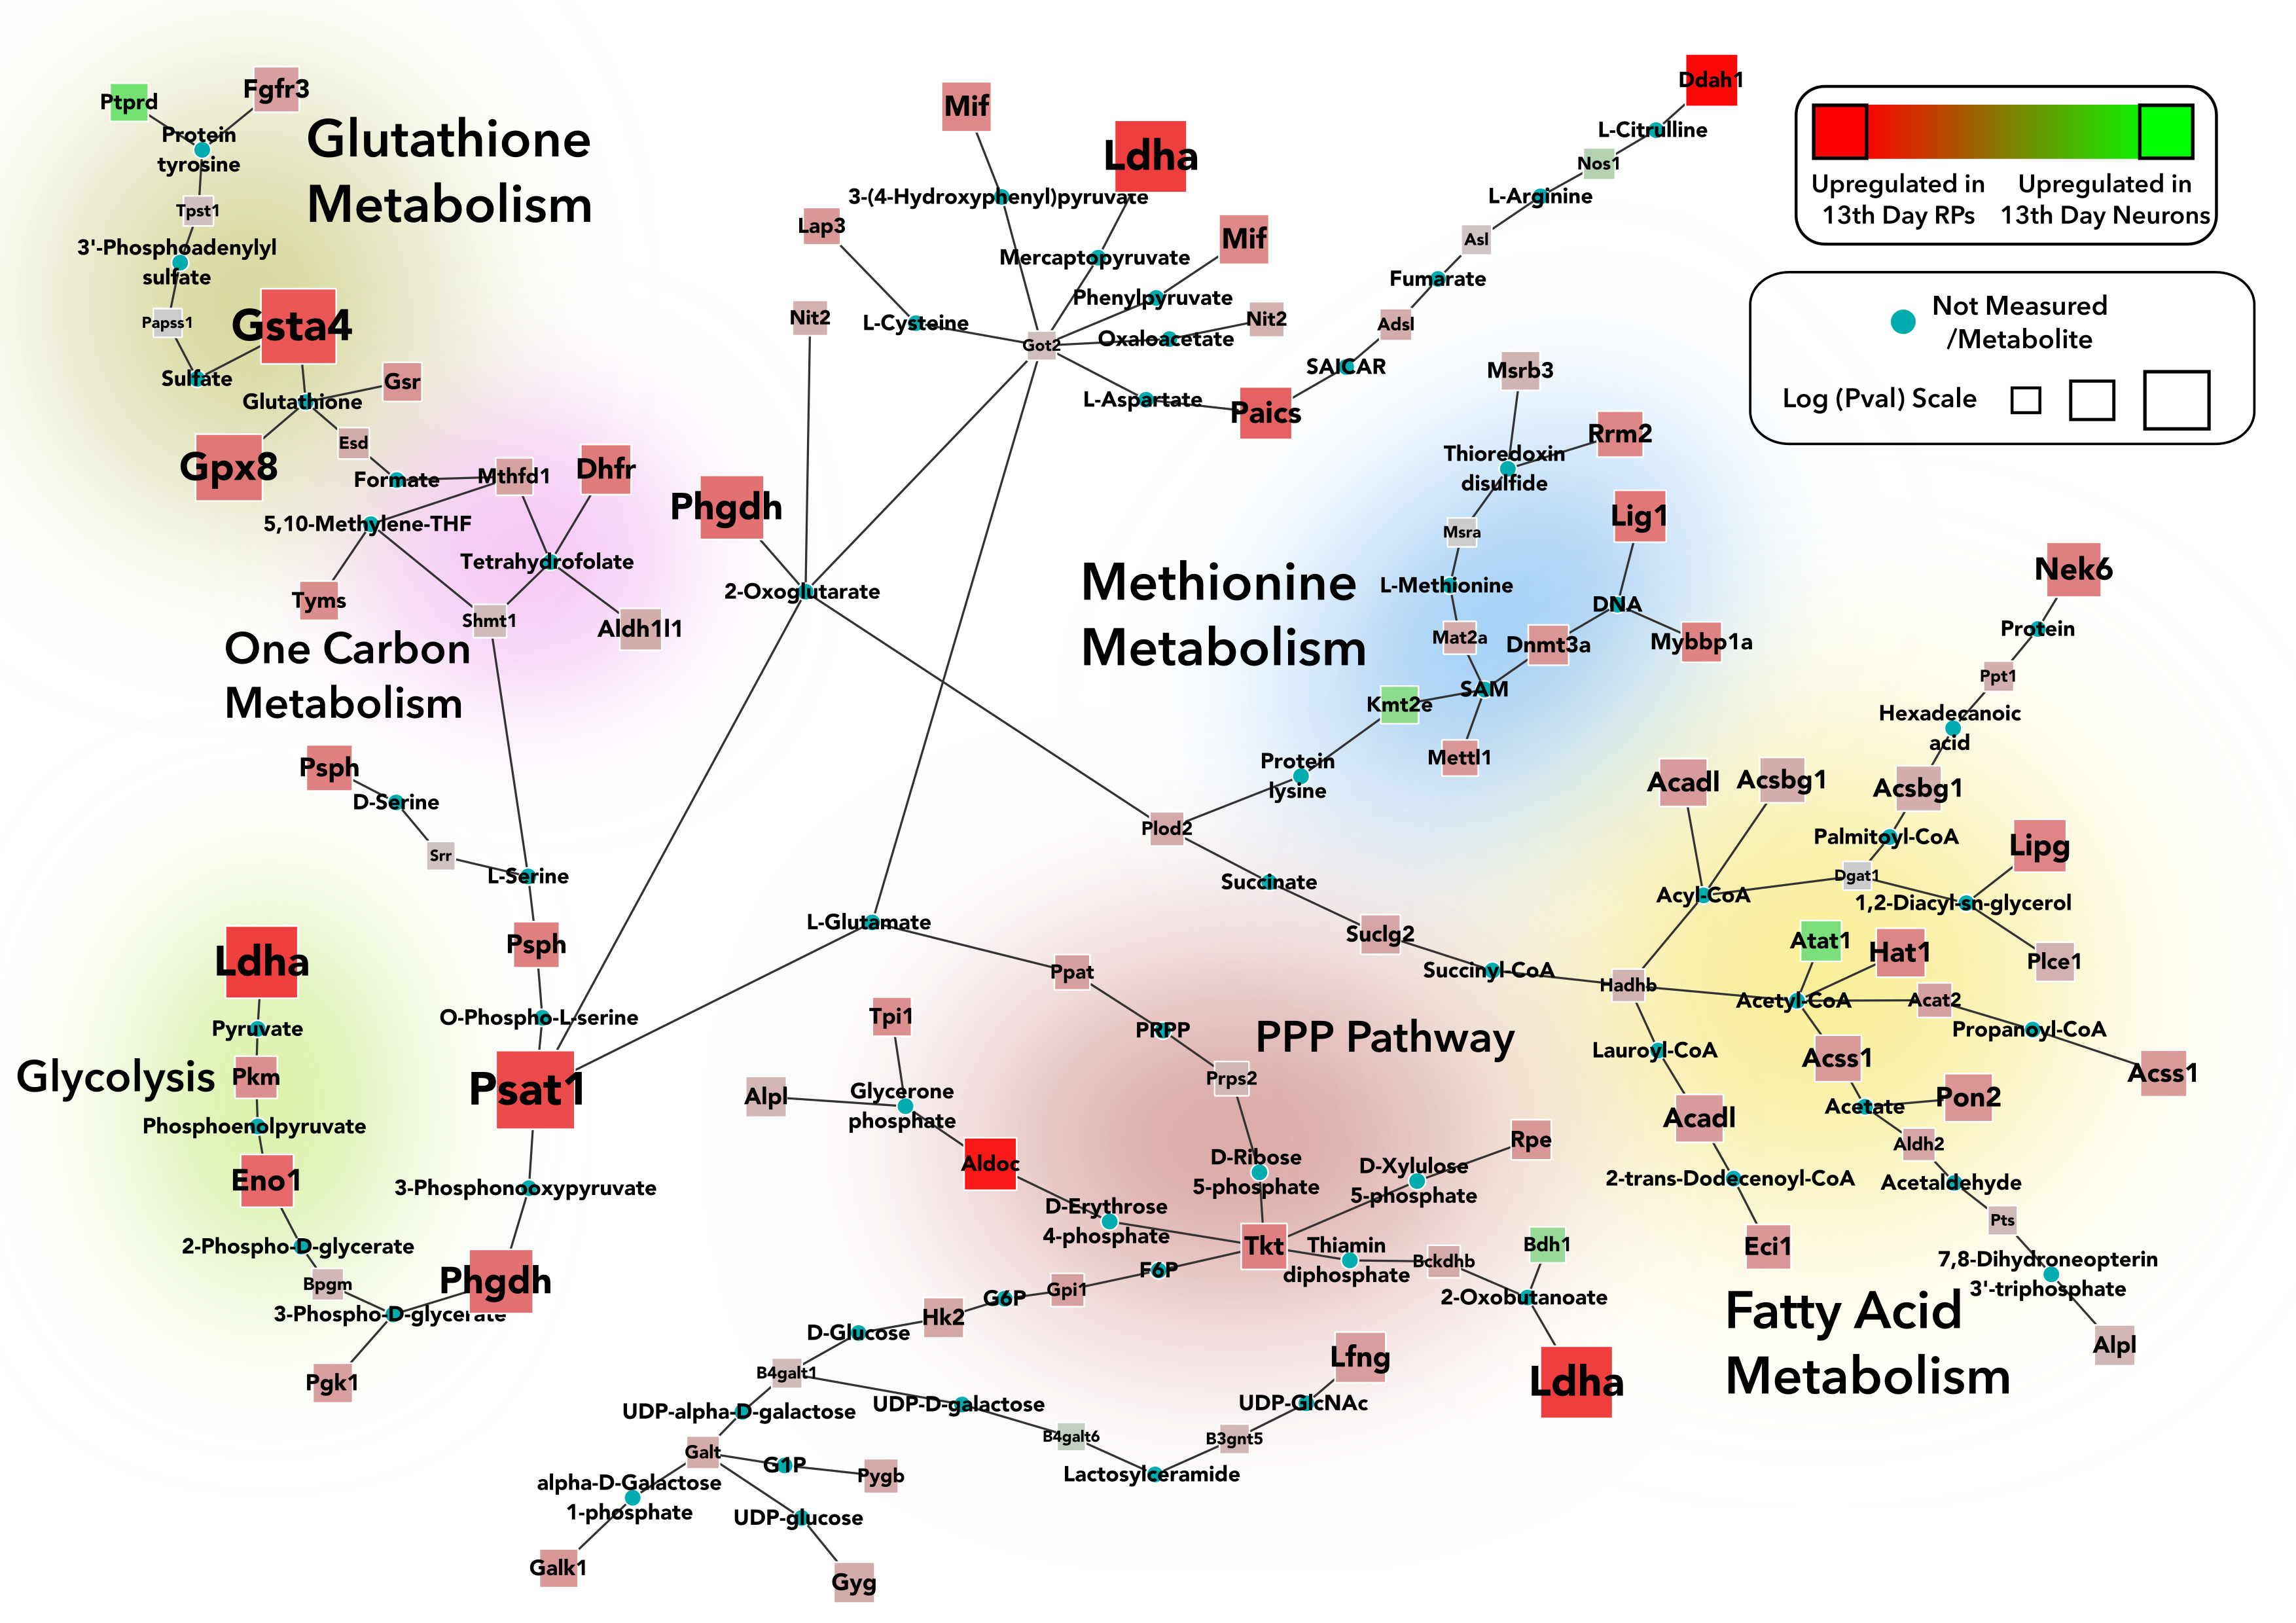

In [40]:
IRdisplay::display_png(file = "E135_RPs_vs_Neurons_intomix.png")

### Save Seurat object into RDS file

In [34]:
saveRDS(E135_Cortical, "E135_Cortical.rds")